In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import os
import tensorflow as tf
import keras
import cv2

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers , models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2

Class Distribution in Train and Test Datasets:
          Train  Test
happy      7215  1774
neutral    4965  1233
sad        4830  1247
fear       4097  1024
angry      3995   958
surprise   3171   831
disgust     436   111


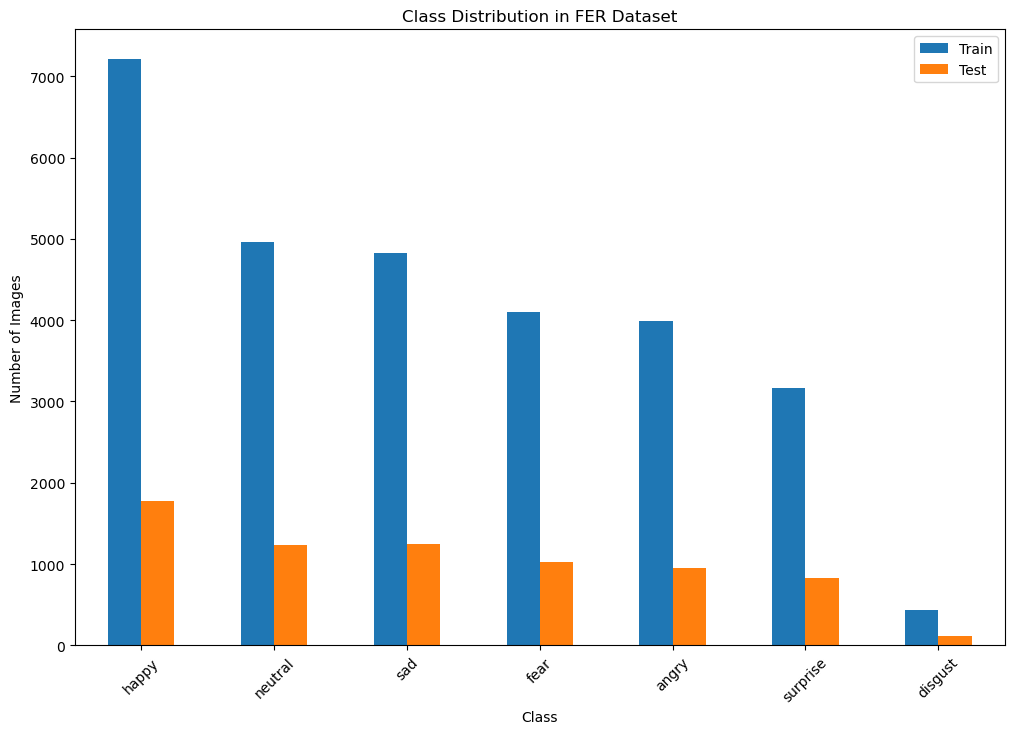

In [2]:
import os
import pandas as pd

# Paths to train and test directories
train_dir = r"D:\CSC\7-seventh semester\GP\grad\AI04-Grad\datasets\ferdataset\train"
test_dir = r"D:\CSC\7-seventh semester\GP\grad\AI04-Grad\datasets\ferdataset\test"

# Function to count the number of classes and their respective file counts
def Classes_Count(path, name):
    Classes_Dict = {}
    
    # Iterate through each class directory
    for Class in os.listdir(path):
        Full_Path = os.path.join(path, Class)
        Classes_Dict[Class] = len(os.listdir(Full_Path))
    
    # Convert to DataFrame for visualization
    df = pd.DataFrame(Classes_Dict, index=[name])
    return df

# Count classes in train and test directories
Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)

# Merge train and test counts for comparison
Combined_Count = pd.concat([Train_Count, Test_Count], axis=1)

# Display the result
print("Class Distribution in Train and Test Datasets:")
print(Combined_Count)

# Visualize the data (optional)
import matplotlib.pyplot as plt

# Bar chart for train and test distributions
Combined_Count.plot(kind='bar', figsize=(12, 8))
plt.title('Class Distribution in FER Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.legend(['Train', 'Test'])
plt.xticks(rotation=45)
plt.show()


In [3]:
pd.concat([Train_Count,Test_Count] , axis=1)

,Train,Test
happy,7215,1774
neutral,4965,1233
sad,4830,1247
fear,4097,1024
angry,3995,958
surprise,3171,831
disgust,436,111


<Axes: >

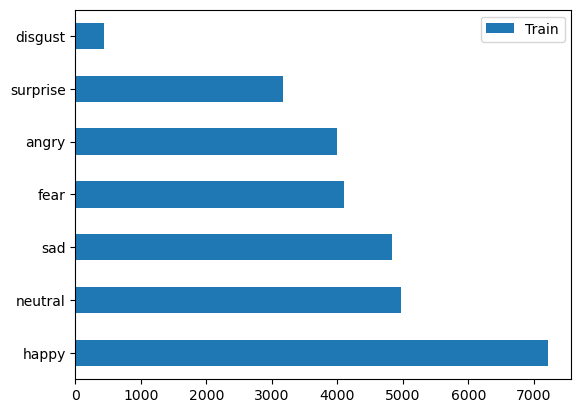

In [4]:
Train_Count.plot(kind='barh')

<Axes: >

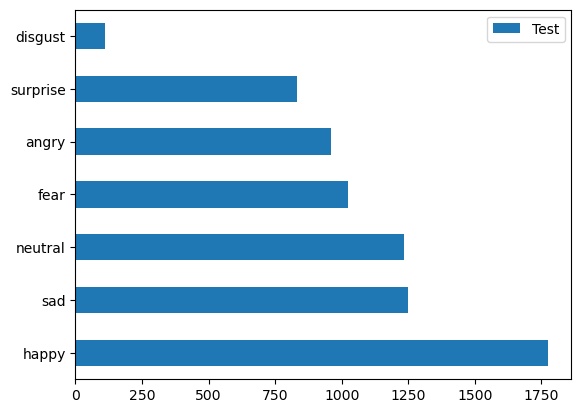

In [5]:
Test_Count.plot(kind='barh')

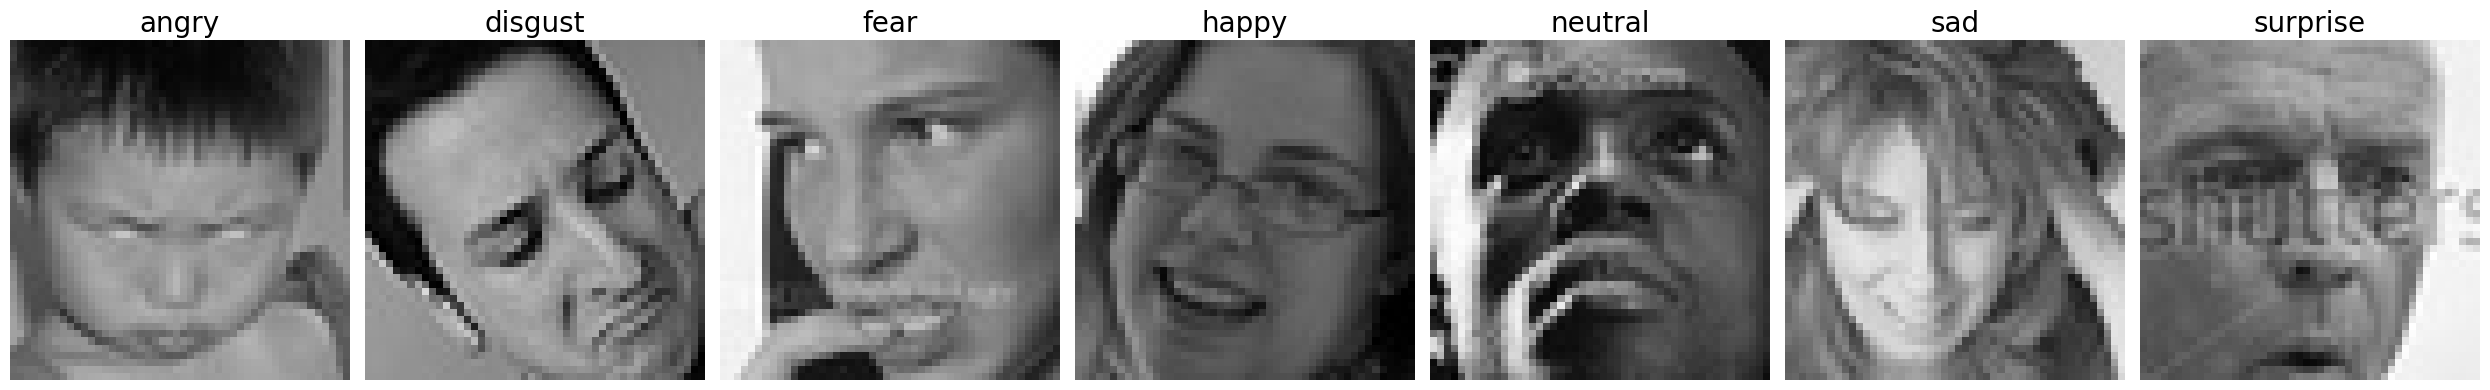

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# Keep BASE_URL and update its value to the train directory path
BASE_URL = r"D:\CSC\7-seventh semester\GP\grad\AI04-Grad\datasets\ferdataset\train"

# Visualization of one image per class
plt.style.use('default')
plt.figure(figsize=(25, 8))
image_count = 1

for directory in os.listdir(BASE_URL):
    if directory[0] != '.':  # Skip hidden files or directories
        for i, file in enumerate(os.listdir(os.path.join(BASE_URL, directory))):
            if i == 1:  # Display only one image per class
                break
            else:
                fig = plt.subplot(1, len(os.listdir(BASE_URL)), image_count)
                image_count += 1
                image_path = os.path.join(BASE_URL, directory, file)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
                plt.imshow(image)
                plt.title(directory, fontsize=20)
                plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
img_shape = 48
batch_size = 64
train_data_path = '../datasets/ferdataset/train'
test_data_path = '../datasets/ferdataset/test'

In [8]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)


test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
def Create_CNN_Model():
    
    model = Sequential()
    
    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    
    #Output
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(7,activation='softmax'))
    
    
    return model

In [10]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                        

In [11]:
# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [12]:
CNN_history = CNN_Model.fit( train_data , validation_data= test_data , epochs=50, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50
448/448 [==============================] - 271s 585ms/step - loss: 2.0341 - accuracy: 0.2097 - val_loss: 1.7943 - val_accuracy: 0.2619 - lr: 0.0010
Epoch 2/50
448/448 [==============================] - 121s 269ms/step - loss: 1.7968 - accuracy: 0.2683 - val_loss: 1.6608 - val_accuracy: 0.3165 - lr: 0.0010
Epoch 3/50
448/448 [==============================] - 59s 132ms/step - loss: 1.6877 - accuracy: 0.3172 - val_loss: 1.5389 - val_accuracy: 0.3959 - lr: 0.0010
Epoch 4/50
448/448 [==============================] - 33s 74ms/step - loss: 1.5602 - accuracy: 0.3883 - val_loss: 1.4515 - val_accuracy: 0.4258 - lr: 0.0010
Epoch 5/50
448/448 [==============================] - 31s 70ms/step - loss: 1.4453 - accuracy: 0.4422 - val_loss: 1.4435 - val_accuracy: 0.4464 - lr: 0.0010
Epoch 6/50
448/448 [==============================] - 35s 78ms/step - loss: 1.3802 - accuracy: 0.4745 - val_loss: 1.3685 - val_accuracy: 0.4700 - lr: 0.0010
Epoch 7/50
448/448 [==============================] -

In [13]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))


113/113 [==============================] - 4s 35ms/step - loss: 0.9445 - accuracy: 0.6492
    Test Loss: 0.94445
Test Accuracy: 64.92%


In [14]:
CNN_Score = CNN_Model.evaluate(train_data)

print("    Train Loss: {:.5f}".format(CNN_Score[0]))
print("Train Accuracy: {:.2f}%".format(CNN_Score[1] * 100))


449/449 [==============================] - 30s 66ms/step - loss: 0.8842 - accuracy: 0.6730
    Train Loss: 0.88421
Train Accuracy: 67.30%


In [21]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
  
  #plt.tight_layout()


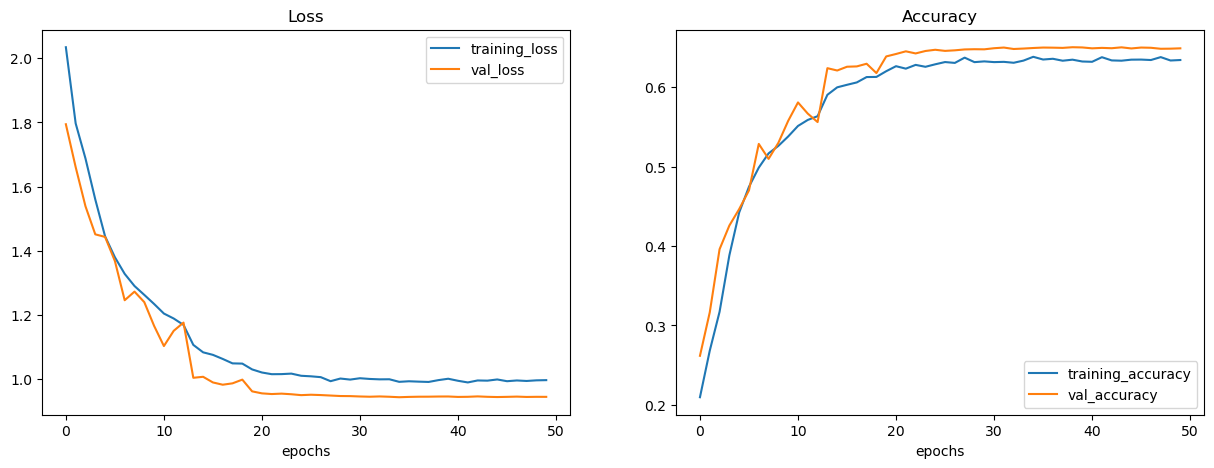

In [16]:
plot_curves(CNN_history)

In [17]:
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)


113/113 [==============================] - 4s 31ms/step


In [18]:
test_data.class_indices


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

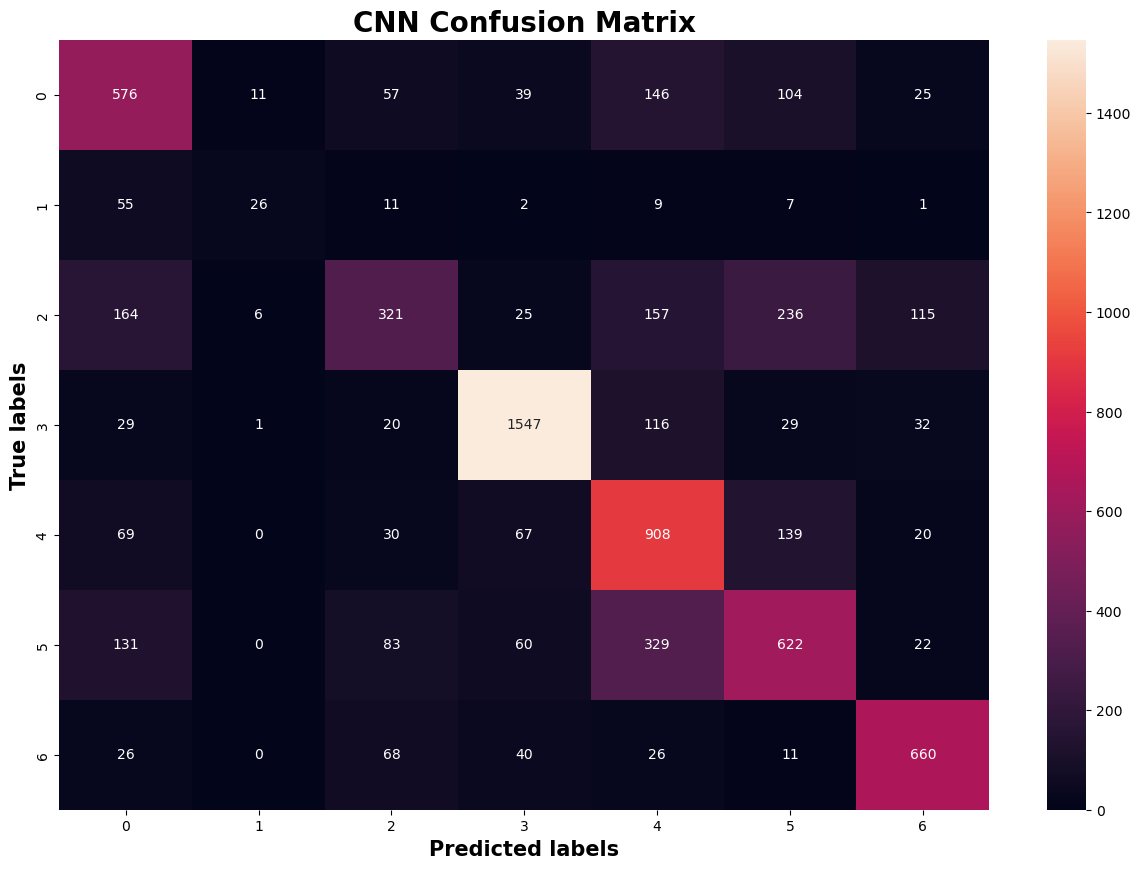

In [19]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report and confusion matrix
print('Classification report:')
print(classification_report(test_data.labels, CNN_Predictions))


Classification report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       958
           1       0.59      0.23      0.34       111
           2       0.54      0.31      0.40      1024
           3       0.87      0.87      0.87      1774
           4       0.54      0.74      0.62      1233
           5       0.54      0.50      0.52      1247
           6       0.75      0.79      0.77       831

    accuracy                           0.65      7178
   macro avg       0.63      0.58      0.58      7178
weighted avg       0.65      0.65      0.64      7178



In [22]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']


In [23]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)


Found 7178 images belonging to 7 classes.


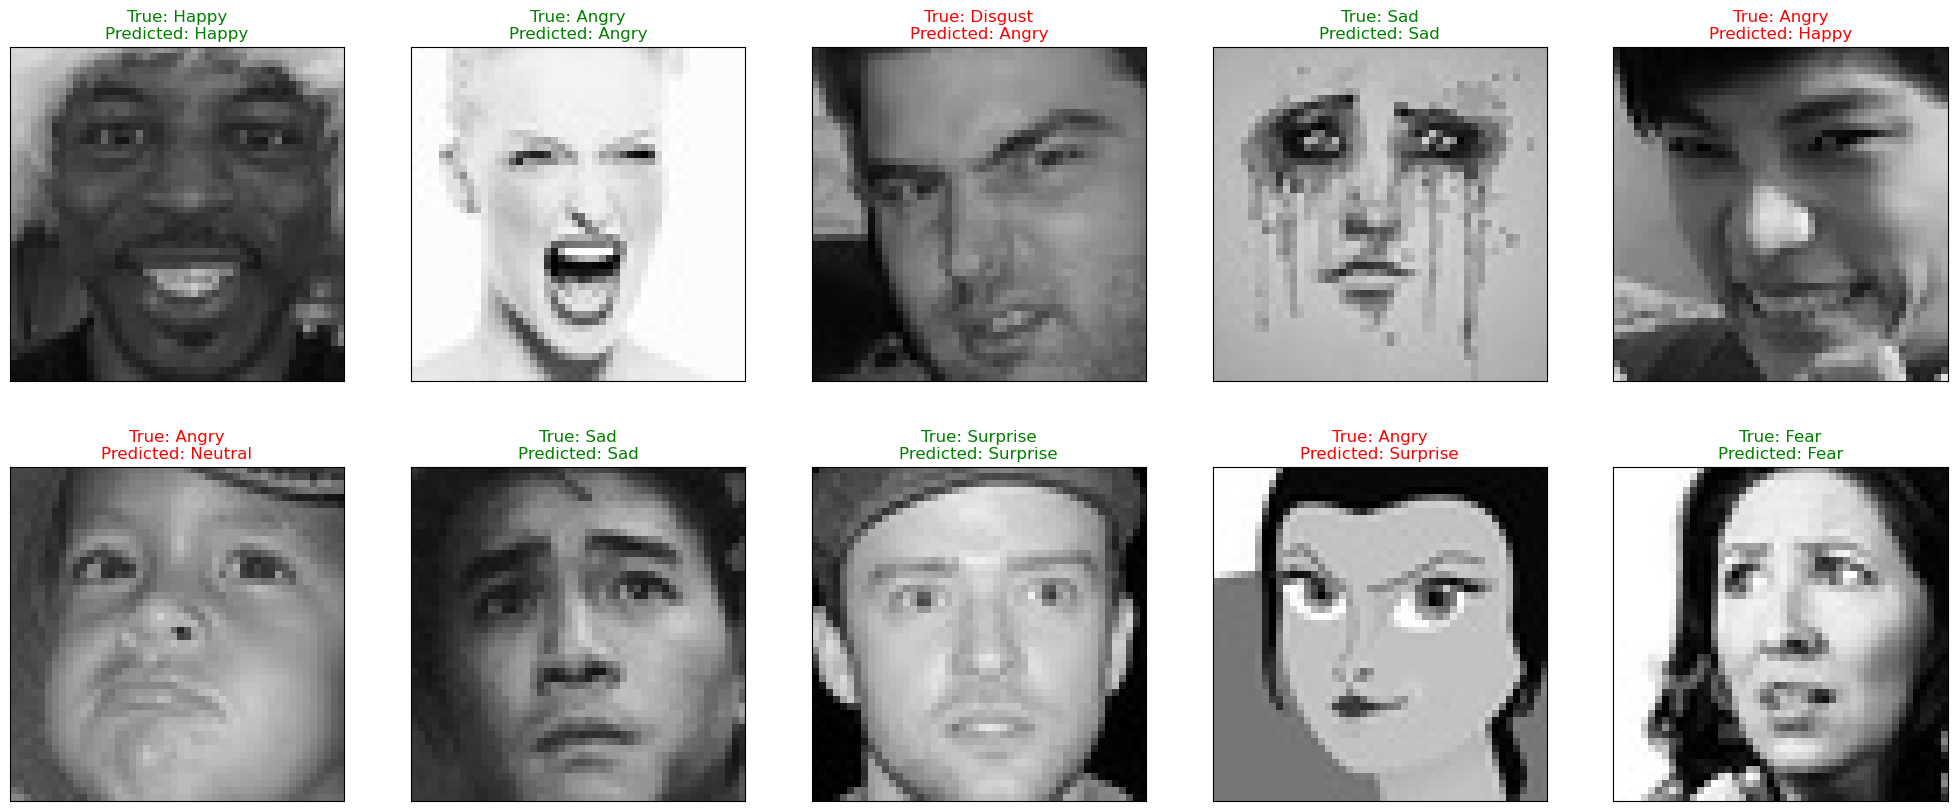

<Figure size 640x480 with 0 Axes>

In [25]:

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(CNN_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()


In [26]:
CNN_Model.save("CNN_Model.h5")

In [8]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64
train_data_path = '../datasets/ferdataset/train'
test_data_path = '../datasets/ferdataset/test'


In [11]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,                                        
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)
test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
# Fine-Tuning ResNet50V2
# 224,224,3
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

#ResNet50V2.summary()


In [14]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False


In [15]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(7,activation='softmax')
                    ])
    return model


In [16]:
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [17]:
# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size


In [18]:
ResNet50V2_history = ResNet50V2_Model.fit(train_data ,validation_data = test_data , epochs=15, batch_size=batch_size,
                                         callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/15
448/448 [==============================] - 361s 780ms/step - loss: 1.4844 - accuracy: 0.4834 - val_loss: 1.3666 - val_accuracy: 0.4912 - lr: 0.0010
Epoch 2/15
448/448 [==============================] - 289s 645ms/step - loss: 1.2321 - accuracy: 0.5518 - val_loss: 1.1608 - val_accuracy: 0.5773 - lr: 0.0010
Epoch 3/15
448/448 [==============================] - 315s 702ms/step - loss: 1.1083 - accuracy: 0.5961 - val_loss: 1.1010 - val_accuracy: 0.6027 - lr: 0.0010
Epoch 4/15
448/448 [==============================] - 567s 1s/step - loss: 1.0611 - accuracy: 0.6156 - val_loss: 4.5976 - val_accuracy: 0.5791 - lr: 0.0010
Epoch 5/15
448/448 [==============================] - 360s 805ms/step - loss: 1.0658 - accuracy: 0.6127 - val_loss: 1.0168 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 6/15
448/448 [==============================] - 194s 433ms/step - loss: 0.9909 - accuracy: 0.6406 - val_loss: 1.0021 - val_accuracy: 0.6394 - lr: 0.0010
Epoch 7/15
448/448 [=============================

In [19]:
ResNet50V2_Score = ResNet50V2_Model.evaluate(test_data)

print("Test Loss: {:.5f}".format(ResNet50V2_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50V2_Score[1] * 100))

113/113 [==============================] - 20s 175ms/step - loss: 0.8982 - accuracy: 0.6853
Test Loss: 0.89823
Test Accuracy: 68.53%


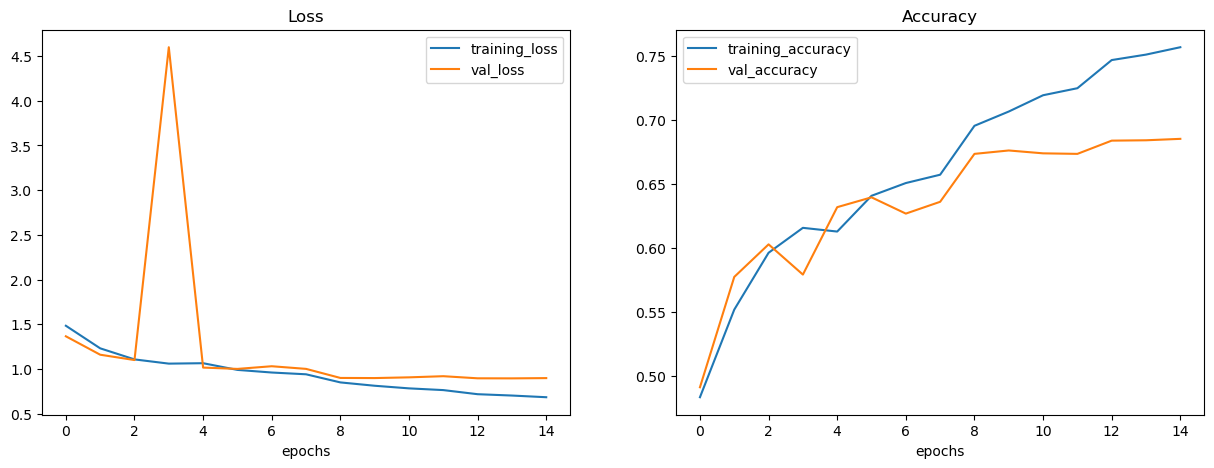

In [22]:
plot_curves(ResNet50V2_history)


In [23]:
ResNet50V2_Predictions = ResNet50V2_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
ResNet50V2_Predictions = np.argmax(ResNet50V2_Predictions, axis=1)


113/113 [==============================] - 19s 169ms/step


Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

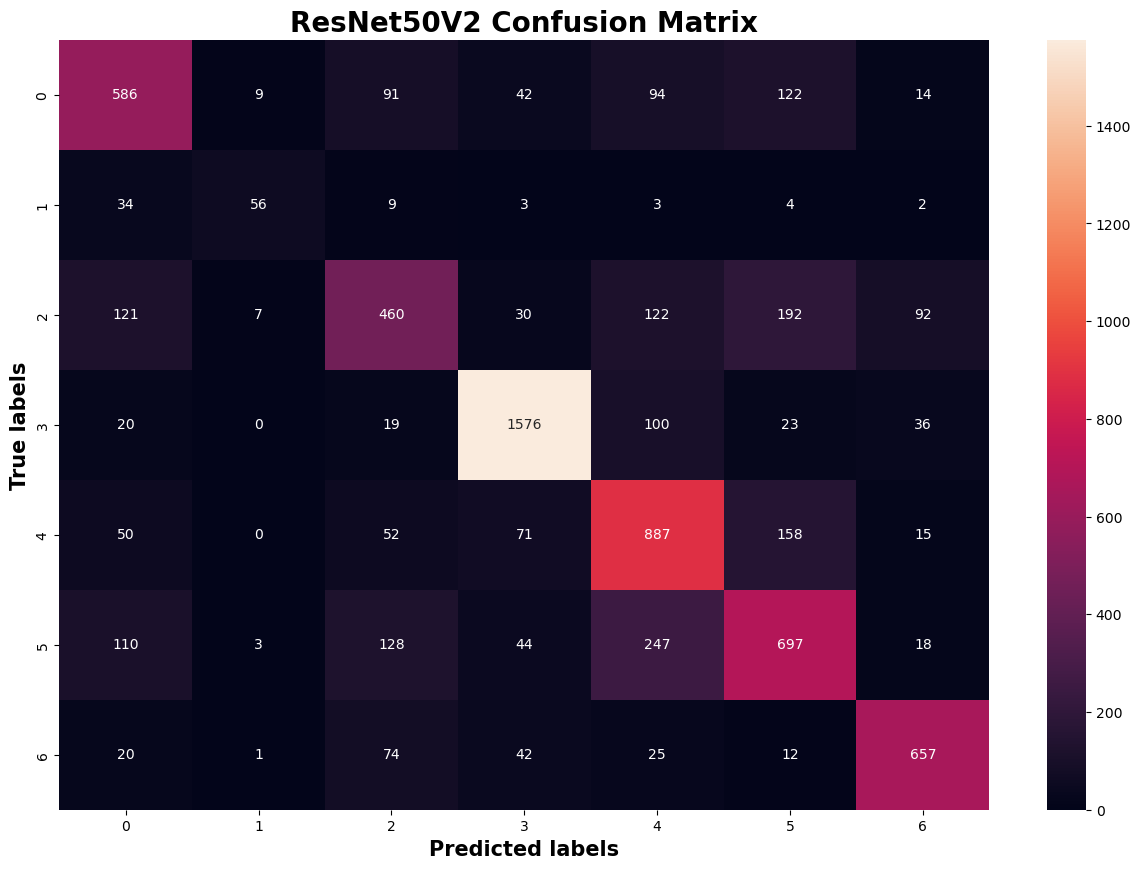

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 

fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, ResNet50V2_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')


In [27]:
Emotion_Classes = ['Angry', 
                  'Disgust', 
                  'Fear', 
                  'Happy', 
                  'Neutral', 
                  'Sad', 
                  'Surprise']


In [28]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)


Found 7178 images belonging to 7 classes.


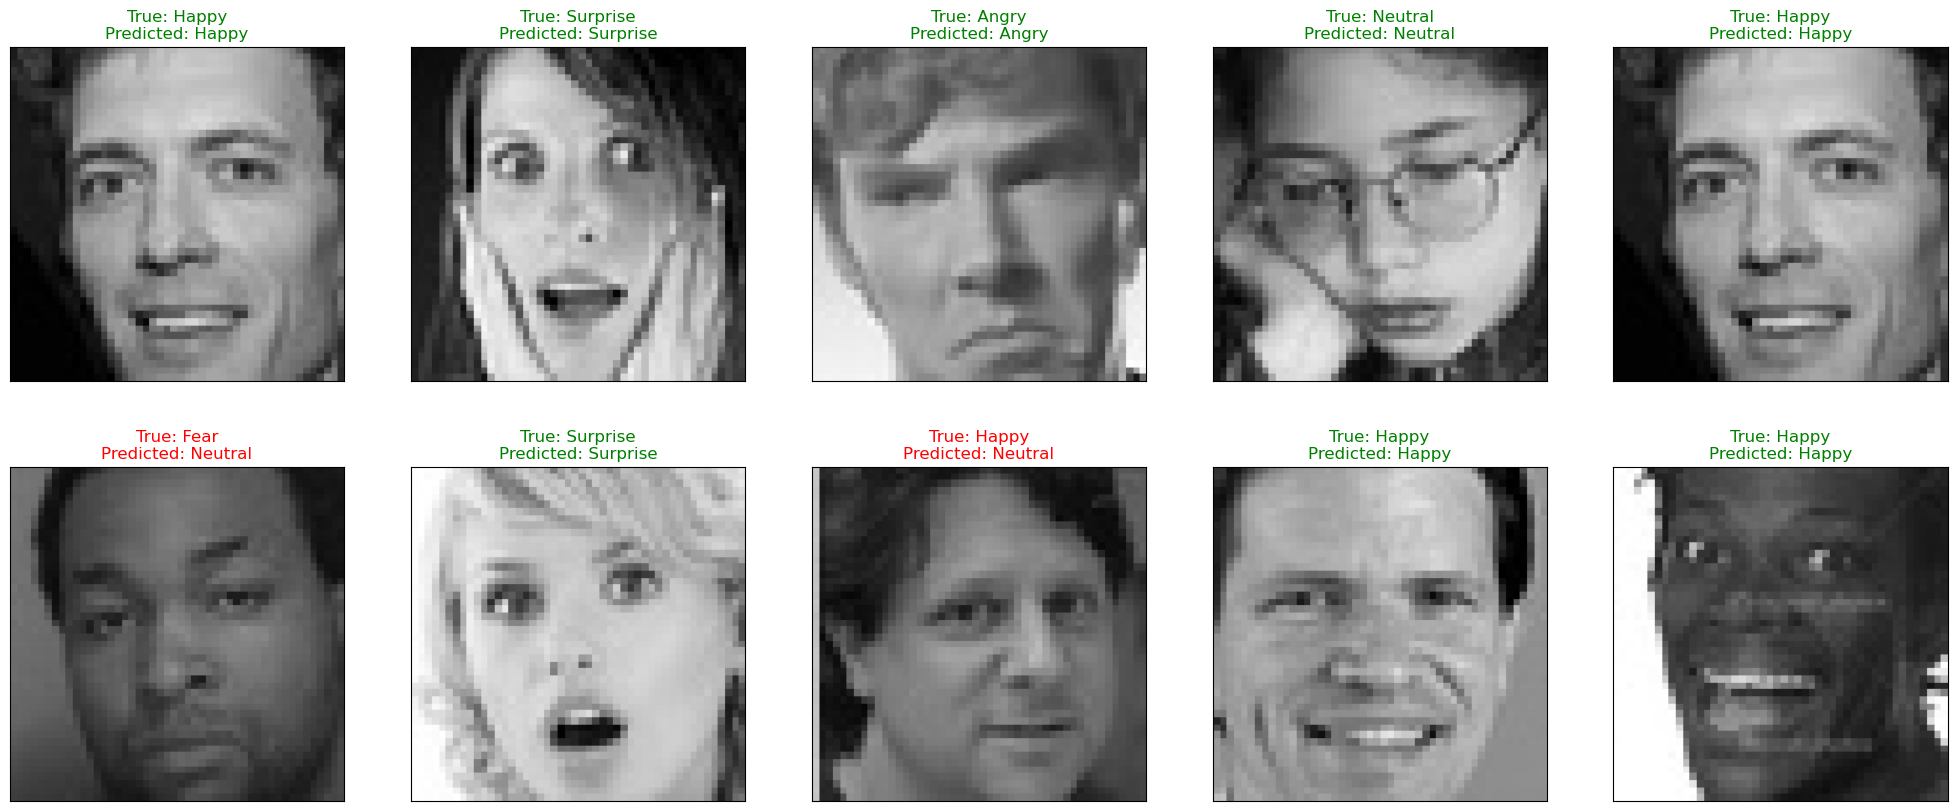

<Figure size 640x480 with 0 Axes>

In [29]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()


In [30]:
ResNet50V2_Model.save("ResNet50V2_Model.h5")


In [31]:
import librosa

# Define paths to the audio and feature folders
audio_folder = '../datasets/deam/DEAM_audio/MEMD_audio'
feature_folder = '../datasets/deam/features'

# Define the sampling rate and duration for the audio files
sr = 22050
duration = 30

# Loop through all the audio files in the folder
for filename in os.listdir(audio_folder):
    # Load the audio file
    y, sr = librosa.load(os.path.join(audio_folder, filename), sr=sr, duration=duration, mono=True)
    # Extract the features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    # Save the features to a file
    np.savez(os.path.join(feature_folder, os.path.splitext(filename)[0] + '.npz'),
             mfccs=mfccs, chroma=chroma, mel=mel, contrast=contrast, tonnetz=tonnetz)


In [33]:
import os
import numpy as np

# Load the saved features
feature_folder = '../datasets/deam/features'

data = []
for filename in os.listdir(feature_folder):
    if filename.endswith('.npz'):
        file_path = os.path.join(feature_folder, filename)
        features = np.load(file_path)
        data.append({
            'filename': filename,
            'mfccs': features['mfccs'],
            'chroma': features['chroma'],
            'mel': features['mel'],
            'contrast': features['contrast'],
            'tonnetz': features['tonnetz']
        })


In [38]:
print("Feature DataFrame columns:", df.columns)
print("Labels DataFrame columns:", labels_df.columns)


Feature DataFrame columns: Index([         0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,
       ...
              157,        158,        159,        160,        161,        162,
              163,        164,        165, 'filename'],
      dtype='object', length=167)
Labels DataFrame columns: Index(['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key',
       'time_signature', 'mood'],
      dtype='object')
